<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на 10 случайных строчек 

In [5]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1315,68,85.50,5696.6,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,One year,Yes,Bank transfer (automatic),0
732,69,85.40,5869.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
1440,71,105.75,7382.85,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),0
2963,29,67.45,1801.1,Female,0,No,No,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,0
2638,67,111.30,7567.2,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
3608,72,20.55,1432.55,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,0
1614,24,54.95,1348.5,Male,0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
3016,24,51.15,1275.7,Male,0,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
2361,42,25.10,1097.15,Male,0,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
218,31,50.40,1580.1,Female,1,Yes,No,No,No phone service,DSL,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),0


Определим наличичие nan и построим таблицу с количеством nan в каждом колонке (если значения nan есть)

In [6]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Из проверки выше следует, что nan'ов нет

Стоит заметить, что при выполнении пунктов ниже я столкнулся с проблемой при построении гистограммы для числового признака TotalSpent. Дело в том, что в некоторых строках в колонке TotalSpent отстутствует значение. Оно считалось как " ". Посмотрим, сколько таких строк

In [7]:
print((data == " ").sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


Как видим, таких строк девять. Из логических соображений эти значения принимают значения 0. Для дальнейшей работы заменим " " на 0 в этих строчках следующим образом

In [8]:
data.TotalSpent = data.TotalSpent.replace(r'\s+', np.nan, regex=True)
data.TotalSpent = data.TotalSpent.fillna(0)
print((data == " ").sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


Как видим, значения " " заменились

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Построим гистограммы для численных признаков

['ClientPeriod', 'MonthlySpending', 'TotalSpent']


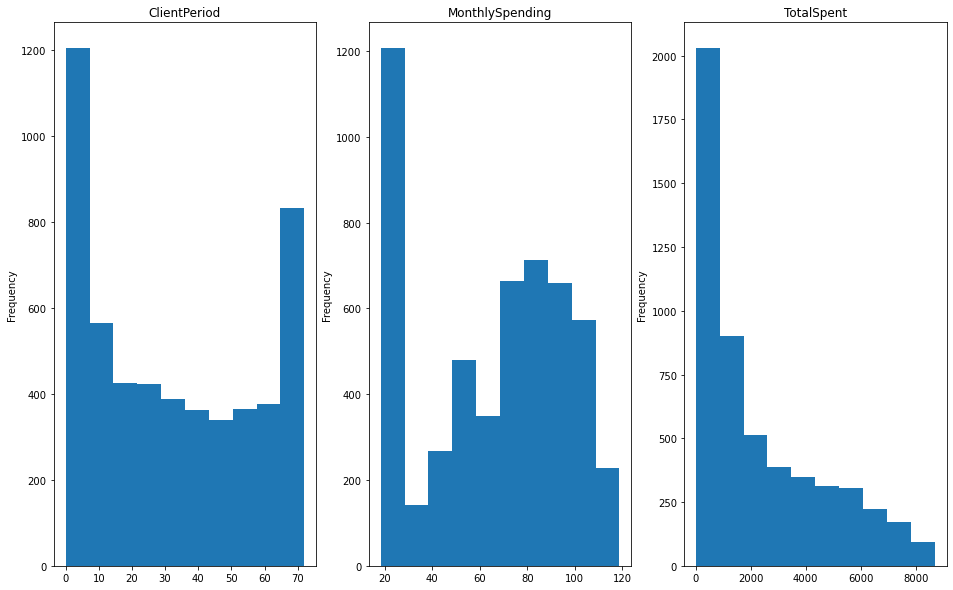

In [9]:
print(num_cols)
#data=data.astype(float)
fig, axs = plt.subplots(1, len(num_cols))
for i, column_name in enumerate(num_cols):
    data[column_name] = pd.to_numeric(data[column_name])
    data[column_name].plot(kind="hist", ax=axs[i]).set_title(column_name)
fig.set_size_inches(16, 10)
plt.show()

Посчитаем количество каждого значения для каждого категориального признака

In [10]:
for column_name in cat_cols:
    print(data[column_name].value_counts())

Male      2655
Female    2627
Name: Sex, dtype: int64
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
No     2705
Yes    2577
Name: HasPartner, dtype: int64
No     3676
Yes    1606
Name: HasChild, dtype: int64
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64
No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64
No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: int64
No    

Теперь построим диаграммы для категориальных признаков

16


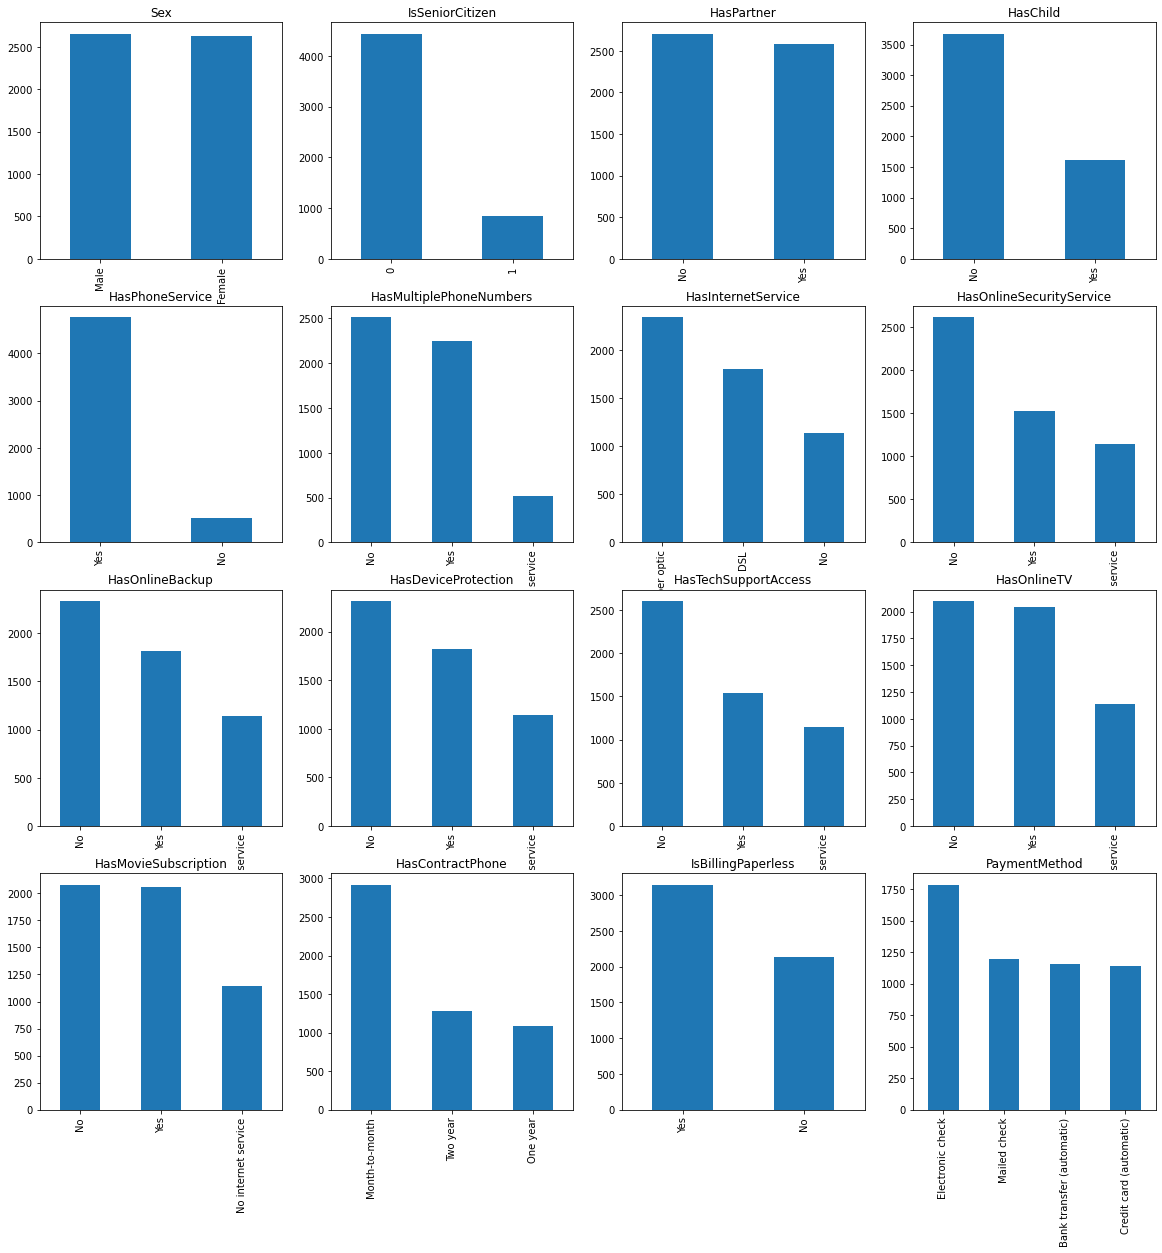

In [11]:
print(len(cat_cols))
rows = 4
fig, axs = plt.subplots(rows, len(cat_cols) // rows)
for i in range(rows):
    for j in range(len(cat_cols) // rows):
        data[cat_cols[i * rows + j]].value_counts().plot(kind="bar", ax=axs[i][j]).set_title(cat_cols[i * rows +j])
fig.set_size_inches(20, 20)
plt.show()


Теперь посмотрим на распределение целевой переменной

In [12]:
data["Churn"].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

Видим, что класс 0 в примерно 3 раза больше класса 1. Классы не являются сильно несбалансированными

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Выполним one-hot-encoding и соберем матрицу признаков и вектор целевых переменных

In [14]:
dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([data[num_cols], dummy_features], axis=1)
y = data[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Выполним разделение на train\test выборку и отнормируем признаки

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучим логистическую регрессию с разными параметрами на обучающей выборке, а качество проверим на тестовой

In [16]:
model = LogisticRegressionCV(Cs=[1000, 100, 10, 1, 0.1, 0.01, 0.001], cv=5, scoring="roc_auc", n_jobs=-1, refit=True, )
model.fit(X_train_scaled, y_train)
print(model.C_)
model.score(X_test_scaled, y_test)

[100.]


0.8267193690490484

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

#### Лучшее качество равное 0.8267193690490484 по метрике ROC-AUC было получено при параметре С = 100

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

Определим непреобразованную матрицу признаков и разделим выборку на обучающую и тестовую. Обучим модель градиентного бустинга со стандратными парметрами. Проверим качество на тествовой выборке

In [17]:
import catboost
from sklearn.metrics import roc_auc_score

cat_indices = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
X_origin = data.iloc[:, :-1]
X_origin_train, X_origin_test, y_train, y_test = train_test_split(X_origin.values, y.values, train_size = 0.8, random_state=42)


In [18]:
catboost_model_default = catboost.CatBoostClassifier(cat_features=cat_indices)
catboost_model_default.fit(X_origin_train, y_train)
y_train_predicted = catboost_model_default.predict_proba(X_origin_train)[:, 1]
y_test_predicted = catboost_model_default.predict_proba(X_origin_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_predicted)
train_auc = roc_auc_score(y_train, y_train_predicted)
print(f"Train AUC: {train_auc}")
print(f"Test AUC: {test_auc}")

Learning rate set to 0.019062
0:	learn: 0.6798227	total: 56.1ms	remaining: 56.1s
1:	learn: 0.6678084	total: 59.6ms	remaining: 29.7s
2:	learn: 0.6553003	total: 63.1ms	remaining: 21s
3:	learn: 0.6435910	total: 66.4ms	remaining: 16.5s
4:	learn: 0.6326850	total: 70.2ms	remaining: 14s
5:	learn: 0.6225823	total: 73.7ms	remaining: 12.2s
6:	learn: 0.6128742	total: 76.6ms	remaining: 10.9s
7:	learn: 0.6048572	total: 78.5ms	remaining: 9.73s
8:	learn: 0.5958847	total: 81.8ms	remaining: 9s
9:	learn: 0.5871696	total: 85.1ms	remaining: 8.42s
10:	learn: 0.5792007	total: 88.3ms	remaining: 7.94s
11:	learn: 0.5713099	total: 91.8ms	remaining: 7.56s
12:	learn: 0.5643834	total: 94.8ms	remaining: 7.2s
13:	learn: 0.5569418	total: 98.3ms	remaining: 6.92s
14:	learn: 0.5502712	total: 102ms	remaining: 6.69s
15:	learn: 0.5441586	total: 105ms	remaining: 6.47s
16:	learn: 0.5381109	total: 109ms	remaining: 6.28s
17:	learn: 0.5324322	total: 112ms	remaining: 6.12s
18:	learn: 0.5268003	total: 116ms	remaining: 5.97s
19:	l

164:	learn: 0.3891572	total: 588ms	remaining: 2.97s
165:	learn: 0.3888679	total: 591ms	remaining: 2.97s
166:	learn: 0.3886342	total: 595ms	remaining: 2.97s
167:	learn: 0.3884733	total: 599ms	remaining: 2.97s
168:	learn: 0.3883674	total: 603ms	remaining: 2.96s
169:	learn: 0.3882153	total: 608ms	remaining: 2.97s
170:	learn: 0.3879833	total: 612ms	remaining: 2.96s
171:	learn: 0.3878007	total: 616ms	remaining: 2.96s
172:	learn: 0.3878002	total: 617ms	remaining: 2.95s
173:	learn: 0.3876802	total: 621ms	remaining: 2.95s
174:	learn: 0.3876706	total: 624ms	remaining: 2.94s
175:	learn: 0.3874036	total: 628ms	remaining: 2.94s
176:	learn: 0.3873755	total: 630ms	remaining: 2.93s
177:	learn: 0.3873591	total: 634ms	remaining: 2.93s
178:	learn: 0.3873043	total: 637ms	remaining: 2.92s
179:	learn: 0.3871391	total: 641ms	remaining: 2.92s
180:	learn: 0.3869335	total: 644ms	remaining: 2.91s
181:	learn: 0.3866917	total: 648ms	remaining: 2.91s
182:	learn: 0.3864635	total: 651ms	remaining: 2.91s
183:	learn: 

348:	learn: 0.3718059	total: 1.18s	remaining: 2.19s
349:	learn: 0.3717976	total: 1.18s	remaining: 2.19s
350:	learn: 0.3717123	total: 1.18s	remaining: 2.19s
351:	learn: 0.3716542	total: 1.19s	remaining: 2.19s
352:	learn: 0.3715574	total: 1.19s	remaining: 2.19s
353:	learn: 0.3715236	total: 1.2s	remaining: 2.18s
354:	learn: 0.3714740	total: 1.2s	remaining: 2.18s
355:	learn: 0.3714300	total: 1.2s	remaining: 2.17s
356:	learn: 0.3713255	total: 1.21s	remaining: 2.17s
357:	learn: 0.3713253	total: 1.21s	remaining: 2.17s
358:	learn: 0.3712343	total: 1.21s	remaining: 2.16s
359:	learn: 0.3712134	total: 1.22s	remaining: 2.16s
360:	learn: 0.3710488	total: 1.22s	remaining: 2.16s
361:	learn: 0.3710475	total: 1.22s	remaining: 2.15s
362:	learn: 0.3710470	total: 1.22s	remaining: 2.15s
363:	learn: 0.3710400	total: 1.23s	remaining: 2.14s
364:	learn: 0.3709650	total: 1.23s	remaining: 2.14s
365:	learn: 0.3708619	total: 1.23s	remaining: 2.14s
366:	learn: 0.3708619	total: 1.23s	remaining: 2.13s
367:	learn: 0.3

522:	learn: 0.3543330	total: 1.77s	remaining: 1.62s
523:	learn: 0.3542873	total: 1.77s	remaining: 1.61s
524:	learn: 0.3542368	total: 1.78s	remaining: 1.61s
525:	learn: 0.3542309	total: 1.78s	remaining: 1.61s
526:	learn: 0.3541521	total: 1.79s	remaining: 1.6s
527:	learn: 0.3540495	total: 1.79s	remaining: 1.6s
528:	learn: 0.3540057	total: 1.79s	remaining: 1.6s
529:	learn: 0.3538328	total: 1.8s	remaining: 1.59s
530:	learn: 0.3537918	total: 1.8s	remaining: 1.59s
531:	learn: 0.3537479	total: 1.8s	remaining: 1.59s
532:	learn: 0.3537333	total: 1.81s	remaining: 1.58s
533:	learn: 0.3536677	total: 1.81s	remaining: 1.58s
534:	learn: 0.3534568	total: 1.82s	remaining: 1.58s
535:	learn: 0.3534483	total: 1.82s	remaining: 1.57s
536:	learn: 0.3533147	total: 1.82s	remaining: 1.57s
537:	learn: 0.3531181	total: 1.83s	remaining: 1.57s
538:	learn: 0.3529745	total: 1.83s	remaining: 1.56s
539:	learn: 0.3527962	total: 1.83s	remaining: 1.56s
540:	learn: 0.3526242	total: 1.84s	remaining: 1.56s
541:	learn: 0.3524

681:	learn: 0.3383603	total: 2.37s	remaining: 1.1s
682:	learn: 0.3383162	total: 2.37s	remaining: 1.1s
683:	learn: 0.3382011	total: 2.38s	remaining: 1.1s
684:	learn: 0.3381200	total: 2.38s	remaining: 1.09s
685:	learn: 0.3380749	total: 2.38s	remaining: 1.09s
686:	learn: 0.3380514	total: 2.39s	remaining: 1.09s
687:	learn: 0.3378637	total: 2.39s	remaining: 1.08s
688:	learn: 0.3378425	total: 2.4s	remaining: 1.08s
689:	learn: 0.3376237	total: 2.4s	remaining: 1.08s
690:	learn: 0.3375739	total: 2.4s	remaining: 1.07s
691:	learn: 0.3375671	total: 2.41s	remaining: 1.07s
692:	learn: 0.3374046	total: 2.41s	remaining: 1.07s
693:	learn: 0.3373772	total: 2.41s	remaining: 1.06s
694:	learn: 0.3372657	total: 2.42s	remaining: 1.06s
695:	learn: 0.3371357	total: 2.42s	remaining: 1.06s
696:	learn: 0.3370298	total: 2.43s	remaining: 1.05s
697:	learn: 0.3368950	total: 2.43s	remaining: 1.05s
698:	learn: 0.3368743	total: 2.43s	remaining: 1.05s
699:	learn: 0.3366706	total: 2.44s	remaining: 1.04s
700:	learn: 0.3365

883:	learn: 0.3217772	total: 3.16s	remaining: 415ms
884:	learn: 0.3216856	total: 3.16s	remaining: 411ms
885:	learn: 0.3215448	total: 3.17s	remaining: 408ms
886:	learn: 0.3215374	total: 3.17s	remaining: 404ms
887:	learn: 0.3215058	total: 3.17s	remaining: 400ms
888:	learn: 0.3214686	total: 3.18s	remaining: 397ms
889:	learn: 0.3213537	total: 3.18s	remaining: 393ms
890:	learn: 0.3212650	total: 3.19s	remaining: 390ms
891:	learn: 0.3210461	total: 3.19s	remaining: 386ms
892:	learn: 0.3210066	total: 3.19s	remaining: 383ms
893:	learn: 0.3209075	total: 3.2s	remaining: 379ms
894:	learn: 0.3207231	total: 3.2s	remaining: 376ms
895:	learn: 0.3206294	total: 3.2s	remaining: 372ms
896:	learn: 0.3205538	total: 3.21s	remaining: 368ms
897:	learn: 0.3204143	total: 3.21s	remaining: 365ms
898:	learn: 0.3203622	total: 3.21s	remaining: 361ms
899:	learn: 0.3202982	total: 3.22s	remaining: 358ms
900:	learn: 0.3202143	total: 3.22s	remaining: 354ms
901:	learn: 0.3201895	total: 3.23s	remaining: 351ms
902:	learn: 0.3

Проверим разные значения количества деревьев и learning rate'a

In [19]:
catboost_model = catboost.CatBoostClassifier(cat_features=cat_indices, eval_metric="AUC", silent=True)
catboost_model.grid_search({"n_estimators" : [250, 500, 750, 1000], "learning_rate" : np.linspace(0.005, 0.015, 10)},
                          X_origin_train, y_train, refit=True)
catboost_model.get_params()


bestTest = 0.8314570393
bestIteration = 249

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8314570	best: 0.8314570 (0)	total: 1.02s	remaining: 40s

bestTest = 0.8334807051
bestIteration = 249

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8334807	best: 0.8334807 (1)	total: 1.96s	remaining: 37.3s

bestTest = 0.8323879975
bestIteration = 243

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8323880	best: 0.8334807 (1)	total: 2.83s	remaining: 34.9s

bestTest = 0.8332937946
bestIteration = 249

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8332938	best: 0.8334807 (1)	total: 3.65s	remaining: 32.9s

bestT


bestTest = 0.8386135553
bestIteration = 999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8386136	best: 0.8392749 (29)	total: 1m 18s	remaining: 13.8s

bestTest = 0.838577611
bestIteration = 925

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8385776	best: 0.8392749 (29)	total: 1m 22s	remaining: 11.8s

bestTest = 0.8396271854
bestIteration = 994

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8396272	best: 0.8396272 (35)	total: 1m 26s	remaining: 9.64s

bestTest = 0.8401340005
bestIteration = 994

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8401340	best: 0.8401340 (36)	total: 1m 31s	remaining:

{'silent': True,
 'eval_metric': 'AUC',
 'cat_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 'iterations': 1000,
 'learning_rate': 0.011666666666666664}

Проверим качество модели с лучшими параметрами

In [20]:
y_train_predicted = catboost_model.predict_proba(X_origin_train)[:, 1]
y_test_predicted = catboost_model.predict_proba(X_origin_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_predicted)
train_auc = roc_auc_score(y_train, y_train_predicted)
print(f"Train AUC: {train_auc}")
print(f"Test AUC: {test_auc}")


Train AUC: 0.884056592998521
Test AUC: 0.8297069661344095


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

#### Значение AUC метрики на тестовой выборке равно 0.8297069661344095 при параметрах: learning_rate = 0.011666666666666664 и n_estimators = 1000

# Предсказания

In [21]:
best_model = catboost_model

In [22]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv', index_col=0)

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.